In [135]:
# Importing requiered libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import importlib
import data_analysis_utils

# Reload the functions module
importlib.reload(data_analysis_utils)

<module 'data_analysis_utils' from 's:\\Courses\\Data Science\\0. Henry\\M7 - Labs - Project MLOps _ steam\\game-recommendation-system\\eda\\data_analysis_utils.py'>

# User Reviews

## Importing file

In [3]:
# Importing user_reviews.csv file
user_reviews_path = "datasets/user_reviews.csv"

# Setting low_memory=False - To read the entire file so it determines the data types accurately. 
# Note: It can increase memory usage for larger datasets
user_reviews_1 = pd.read_csv(user_reviews_path, low_memory=False)

## Data Preparation & Transformation

The current data 

In [4]:
user_reviews_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25485 entries, 0 to 25484
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      25485 non-null  object
 1   user_url     25485 non-null  object
 2   item_id      25485 non-null  object
 3   posted       25485 non-null  object
 4   last_edited  25485 non-null  object
 5   helpful      25485 non-null  object
 6   recommend    25485 non-null  object
 7   funny        25485 non-null  object
 8   review       25485 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


In [5]:
# converting values to it's corresponding data types
user_reviews_2 = user_reviews_1.copy()
user_reviews_2['item_id'] = user_reviews_2['item_id'].apply(ast.literal_eval)
user_reviews_2['posted'] = user_reviews_2['posted'].apply(ast.literal_eval)
user_reviews_2['last_edited'] = user_reviews_2['last_edited'].apply(ast.literal_eval)
user_reviews_2['recommend'] = user_reviews_2['recommend'].apply(ast.literal_eval)
user_reviews_2['review'] = user_reviews_2['review'].apply(ast.literal_eval)

Sometimes user names can be the same between user.<br>
Just to verify that the current user IDs are unique, and no user names.<br>
The user IDs will be compared with user_url, duw to user_url is unique for each user.

In [6]:
# Iteration of the rows and compare them, if user IDs don't match it will print the index and the value
for index, row in user_reviews_2.iterrows():
    id_value = row["user_id"]
    url_value = row["user_url"]
    
    id_len = len(id_value)
    url_id = url_value[-id_len:]
    if id_value != url_id:
        print(index, id_value)

### Column "posted"

During data preparation, some dates couldn't be converted to "yyyy-mm-dd", those dates will be compared with the values from "last_edited" column.

In [7]:
# Verifying data type of the column
posted_data_type = data_analysis_utils.column_data_types_summary(user_reviews_2, "posted")
posted_data_type

{'column_name': 'posted', 'data_type_counts': {"<class 'list'>": 25485}}

In [8]:
# Verifying data type of the column
posted_data_type = data_analysis_utils.column_data_types_summary(user_reviews_2, "last_edited")
posted_data_type

{'column_name': 'last_edited', 'data_type_counts': {"<class 'list'>": 25485}}

In [9]:
# Creating a copy of the dataframe
user_reviews_3 = user_reviews_2.copy()

# The "Posted %B %d." patter of the datetime values of the datframe will automatically take the year 1900,
# this will help to avoid removing date from the dataframe

# Setting the original datetime patterns
original_date_list = ["Posted %B %d, %Y.", "Posted %B %d.", "%Y-%m-%d"]

# Transforming to datetime type using "convert_column_to_dates" function
data_analysis_utils.convert_column_to_dates(user_reviews_3, "posted", original_date_list)

{'total_rows': 25485,
 'column_name': 'posted',
 'num_failed_conversions': 24,
 'report': {348: {6: 'Posted February 29.'},
  1544: {1: 'Posted February 29.'},
  2696: {3: 'Posted February 29.'},
  2905: {2: 'Posted February 29.'},
  3852: {3: 'Posted February 29.'},
  5061: {0: 'Posted February 29.'},
  6037: {0: 'Posted February 29.'},
  6104: {0: 'Posted February 29.'},
  9111: {0: 'Posted February 29.'},
  10454: {1: 'Posted February 29.'},
  10493: {0: 'Posted February 29.'},
  10633: {0: 'Posted February 29.'},
  10651: {0: 'Posted February 29.'},
  11404: {1: 'Posted February 29.'},
  11945: {0: 'Posted February 29.'},
  14914: {1: 'Posted February 29.'},
  15554: {2: 'Posted February 29.'},
  16112: {0: 'Posted February 29.'},
  16143: {0: 'Posted February 29.'},
  16439: {0: 'Posted February 29.'},
  20438: {0: 'Posted February 29.', 1: 'Posted February 29.'},
  21898: {0: 'Posted February 29.'},
  24150: {4: 'Posted February 29.'},
  24457: {0: 'Posted February 29.'}}}

In [10]:
print(user_reviews_3['posted'][2696])
print(user_reviews_3['last_edited'][2696])
print(user_reviews_3['recommend'][2696])

['1900-05-20', '1900-07-14', '1900-03-07', 'Posted February 29.', '1900-02-10', '1900-02-09', '1900-02-08']
['', '', '', '', '', '', '']
[True, True, True, True, True, True, True]


## EDA

### Review wordcloud

Identify what are the most common words users comment

#### Wordcloud of reviews with clean data

In [136]:
# Apply the preprocess_text function to the 'reviews' column
user_reviews_3['cleaned_reviews'] = user_reviews_3['review'].apply(data_analysis_utils.preprocess_text)

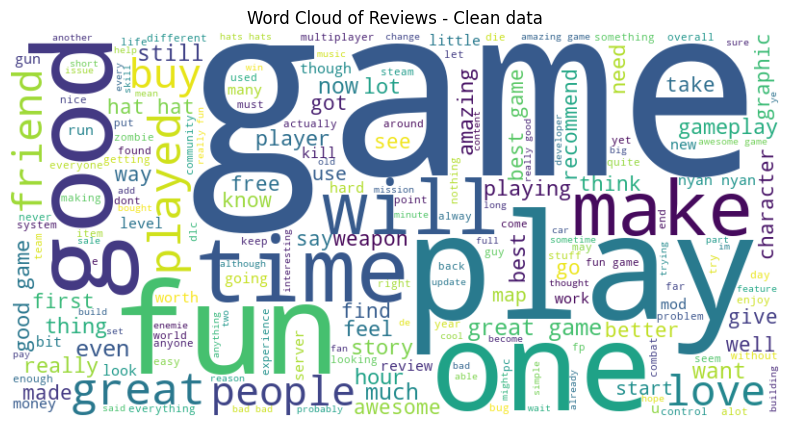

In [138]:
# Generate the word cloud from the cleaned_reviews column
wordcloud_reviews = WordCloud(width=800, height=400, background_color='white').generate(' '.join(user_reviews_3['cleaned_reviews']))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_reviews, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews - Clean data')
plt.show()

#### Wordcloud of reviews without cleanning them

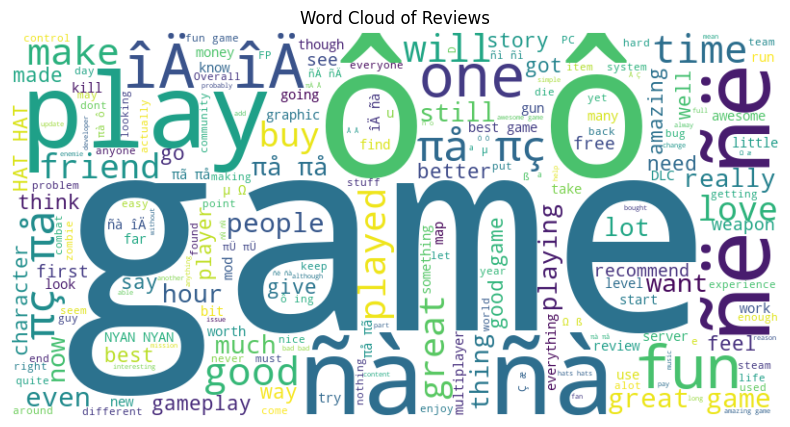

In [137]:
# Step 1: Convert lists to strings
user_reviews_3['review_str'] = user_reviews_3['review'].apply(lambda x: ' '.join(x))

# Step 2: Generate the word cloud
wordcloud_comments = WordCloud(width=800, height=400, background_color='white').generate(' '.join(user_reviews_3['review_str']))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_comments, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title('Word Cloud of Reviews')
plt.show()

# User Items

## Importing file

In [11]:
# Importing user_items.csv file
user_items_path = "datasets/user_items.csv"

# Setting low_memory=False - To read the entire file so it determines the data types accurately. 
# Note: It can increase memory usage for larger datasets
user_items_1 = pd.read_csv(user_items_path, low_memory=False)

## Data Preparation & Transformation

In [12]:
user_items_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87625 entries, 0 to 87624
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           87625 non-null  object
 1   steam_id          87625 non-null  int64 
 2   user_url          87625 non-null  object
 3   items_count       87625 non-null  int64 
 4   item_id           87625 non-null  object
 5   item_name         87625 non-null  object
 6   playtime_forever  87625 non-null  object
 7   playtime_2weeks   87625 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.3+ MB


In [13]:
# converting values to it's corresponding data types
user_items_2 = user_items_1.copy()
user_items_2['item_id'] = user_items_2['item_id'].apply(ast.literal_eval)
user_items_2['item_name'] = user_items_2['item_name'].apply(ast.literal_eval)
user_items_2['playtime_forever'] = user_items_2['playtime_forever'].apply(ast.literal_eval)

Sometimes user names can be the same between user.<br>
Just to verify that the current user IDs are unique, and no user names.<br>
The user IDs will be compared with user_url, duw to user_url is unique for each user.

In [14]:
# Iteration of the rows and compare them, if user IDs don't match it will print the index and the value
for index, row in user_items_2.iterrows():
    id_value = row["user_id"]
    url_value = row["user_url"]
    
    id_len = len(id_value)
    url_id = url_value[-id_len:]
    if id_value != url_id:
        print(index, id_value)

In [15]:
user_items_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87625 entries, 0 to 87624
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           87625 non-null  object
 1   steam_id          87625 non-null  int64 
 2   user_url          87625 non-null  object
 3   items_count       87625 non-null  int64 
 4   item_id           87625 non-null  object
 5   item_name         87625 non-null  object
 6   playtime_forever  87625 non-null  object
 7   playtime_2weeks   87625 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.3+ MB


In [16]:
data_analysis_utils.column_data_types_summary(user_items_2, "item_id")

{'column_name': 'item_id', 'data_type_counts': {"<class 'list'>": 87625}}

In [117]:
user_items_2["item_name"]

0        [Counter-Strike, Team Fortress Classic, Day of...
1        [Counter-Strike, Counter-Strike: Condition Zer...
2        [Red Orchestra: Ostfront 41-45, Mare Nostrum, ...
3        [Counter-Strike, Team Fortress Classic, Day of...
4        [Day of Defeat: Source, Team Fortress Classic,...
                               ...                        
87620    [CS:GO Player Profiles, CS:GO Player Profiles:...
87621    [TrackMania Nations Forever, Bloodline Champio...
87622                                                   []
87623    [Unturned, Heroes & Generals, BrainBread 2, Al...
87624                                                   []
Name: item_name, Length: 87625, dtype: object

## EDA

### Game wordcloud

Identify the most common game users play

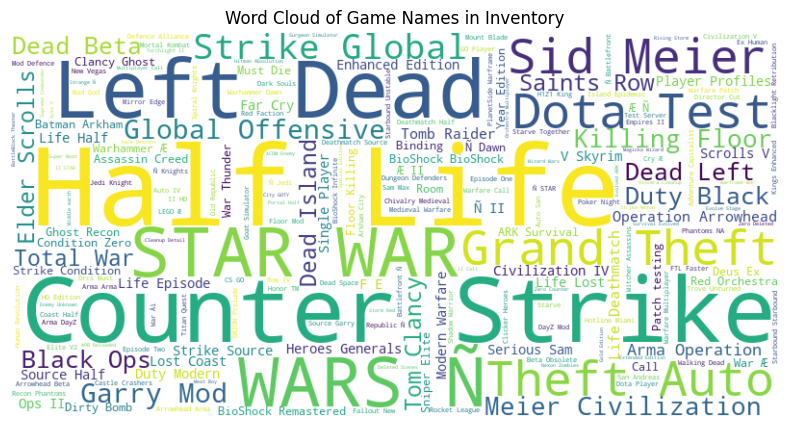

In [119]:
# Step 1: Convert lists to strings
user_items_2['item_name_str'] = user_items_2['item_name'].apply(lambda x: ' '.join(x))

# Step 2: Generate the word cloud
wordcloud_games = WordCloud(width=800, height=400, background_color='white').generate(' '.join(user_items_2['item_name_str']))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_games, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title('Word Cloud of Game Names in Inventory')
plt.show()

# Steam Games

## Importing file

In [17]:
# Importing steam_games.csv file
steam_games_path = "datasets/steam_games.csv"

# Setting low_memory=False - To read the entire file so it determines the data types accurately. 
# Note: It can increase memory usage for larger datasets
steam_games_1 = pd.read_csv(steam_games_path, low_memory=False)

## Data Preparation & Transformation

In [18]:
steam_games_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32134 entries, 0 to 32133
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24063 non-null  object 
 1   genres        28851 non-null  object 
 2   app_name      32132 non-null  object 
 3   title         30084 non-null  object 
 4   url           32134 non-null  object 
 5   release_date  30067 non-null  object 
 6   tags          31971 non-null  object 
 7   reviews_url   32132 non-null  object 
 8   specs         31464 non-null  object 
 9   price         30757 non-null  float64
 10  early_access  32134 non-null  bool   
 11  id            32132 non-null  float64
 12  developer     28835 non-null  object 
dtypes: bool(1), float64(2), object(10)
memory usage: 3.0+ MB


In [19]:
steam_games_2 = steam_games_1.copy()

# Converting values to their repective data types
# "specs" and "genres" have nan values.

# Apply safe_literal_eval to the columns
steam_games_2['genres'] = steam_games_2['genres'].apply(data_analysis_utils.safe_literal_eval)
steam_games_2['specs'] = steam_games_2['specs'].apply(data_analysis_utils.safe_literal_eval)

Games ID have 2 missing values, verifying these values with corresponding game url.<br>

In [20]:
# Iteration of the rows and compare them, if user IDs don't match it will print the index and the value
for index, row in steam_games_2.iterrows():
    id_value = str(row["id"])[:-2]
    url_value = row["url"]
    
    id_len = len(id_value)
    url_id = url_value[34:34+id_len]
    if id_value != url_id:
        print(index, id_value)

74 n
30960 n


If possible, inserting the ids extracted from the url.

In [21]:
# 1st id value
steam_games_2["url"][30960]

'http://store.steampowered.com/app/200260'

In [22]:
# Search for the value in the 'id' column and get the indices
indices = steam_games_2[steam_games_2["id"] == 200260].index
indices

Index([1068], dtype='int64')

The ID already exist

In [23]:
# Deleting corresponding duplicate value
steam_games_2 = steam_games_2.drop(30960)

# Verifying previous action
indices = steam_games_2[steam_games_2["id"] == 30960].index
indices

Index([], dtype='int64')

In [24]:
# 2nd value
steam_games_2["url"][74]

'http://store.steampowered.com/'

In [25]:
# Extract the row using .iloc and print it
value_data = steam_games_2.iloc[74]
print(value_data)

publisher                                  NaN
genres                                     NaN
app_name                                   NaN
title                                      NaN
url             http://store.steampowered.com/
release_date                               NaN
tags                                       NaN
reviews_url                                NaN
specs                                      NaN
price                                    19.99
early_access                             False
id                                         NaN
developer                                  NaN
Name: 74, dtype: object


A lot of information is missing, the value isn't relevant, the value is deleted.

In [26]:
steam_games_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 0 to 32133
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24062 non-null  object 
 1   genres        28850 non-null  object 
 2   app_name      32131 non-null  object 
 3   title         30083 non-null  object 
 4   url           32133 non-null  object 
 5   release_date  30066 non-null  object 
 6   tags          31970 non-null  object 
 7   reviews_url   32132 non-null  object 
 8   specs         31463 non-null  object 
 9   price         30756 non-null  float64
 10  early_access  32133 non-null  bool   
 11  id            32132 non-null  float64
 12  developer     28834 non-null  object 
dtypes: bool(1), float64(2), object(10)
memory usage: 4.2+ MB


In [27]:
# Deleting corresponding value
steam_games_2 = steam_games_2.drop(74)

# Verifying previous action
indices = steam_games_2[steam_games_2["id"] == 74].index
indices

Index([], dtype='int64')

In [28]:
data_analysis_utils.column_data_types_summary(user_items_2, "item_id")

{'column_name': 'item_id', 'data_type_counts': {"<class 'list'>": 87625}}

## EDA

### Price distribution

Identify if there are very expensive games that are not very accessible to the gaming community

#### Summary Statistics

In [105]:
# Calculating statistics
pr_mean = steam_games_2['price'].mean()
pr_median = steam_games_2['price'].median()
pr_std = steam_games_2['price'].std()
pr_min = steam_games_2['price'].min()
pr_max = steam_games_2['price'].max()
pr_mode = steam_games_2['price'].mode()

print("mean:", pr_mean)
print("median:", pr_median)
print("std:", pr_std)
print("min:", pr_min)
print("max:", pr_max)
print("mode:", pr_mode)

mean: 8.89691920013006
median: 4.99
std: 16.38500153198154
min: 0.0
max: 995.0
mode: 0    4.99
Name: price, dtype: float64


#### Data Visualization

In [106]:
# Deleting null on 'developer' column
steam_games_price = steam_games_2.dropna(subset=['developer'])

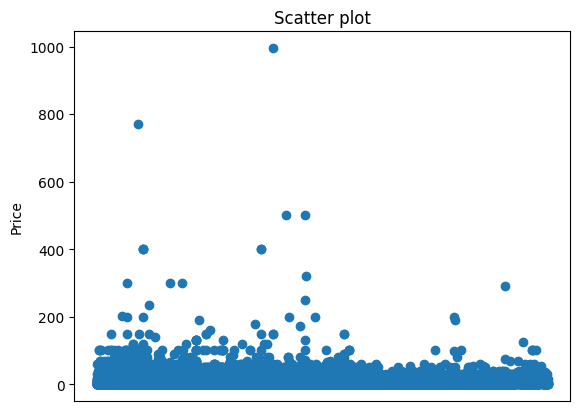

In [108]:
# X' and 'Y' columns for graphic
x_dev = steam_games_price['developer']
y_pr = steam_games_price['price']

# Scatter plot
plt.scatter(x_dev, y_pr)

plt.title('Scatter plot')
plt.ylabel('Price')

plt.xticks([])

plt.show()

Most games are within the range of $0 to $100 and very few games are outside of this range.

### Genres wordcloud

Identify what are the most popular genres of the games

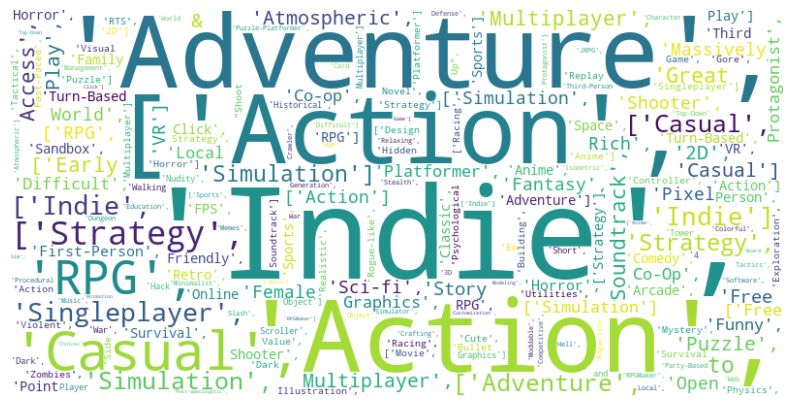

In [115]:
# The columns "tags", "specs" and "genres" have genres values 
word_freq_tags = steam_games_2["tags"].str.split(expand=True).stack().value_counts()

# Creating the cloud of words
wordcloud = WordCloud(width= 800, height= 400, background_color= "white").generate_from_frequencies(word_freq_tags)

# Visualization
plt.figure(figsize= (10, 6))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

# Creating files

## API Function 1 "userdata"

Return amount of money spent by the user, the recommendation percentage based on reviews.

### Creating dataframes

Creating new dataframes with only the necessary columns

In [30]:
print(user_reviews_3.columns)
print(user_items_2.columns)
print(steam_games_2.columns)

Index(['user_id', 'user_url', 'item_id', 'posted', 'last_edited', 'helpful',
       'recommend', 'funny', 'review'],
      dtype='object')
Index(['user_id', 'steam_id', 'user_url', 'items_count', 'item_id',
       'item_name', 'playtime_forever', 'playtime_2weeks'],
      dtype='object')
Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')


In [32]:
# Necessary data:

# user_reviews = user_id, user_url, recommend
# user_items = user_url, items_count, item_id
# steam_games = id, price

user_reviews_columns = ["user_id", "item_id", "recommend", "user_url"] # user_url and review are added to be used in API function 4 and 6
user_items_columns = ["user_id", "items_count", "item_id", "playtime_forever"] # playtime_forever is added to be used in API function 3
steam_games_columns = ["id", "price", "developer"] # developer is added to be used in API function 5

# Create new DataFrames with only the selected columns
user_reviews_dataframe_1 = user_reviews_2[user_reviews_columns]
user_items_dataframe_1 = user_items_2[user_items_columns]
steam_games_dataframe_1 = steam_games_2[steam_games_columns]

### Merging dataframes

The user_items dataframe have more data than user_reviews.<br>
Identifying missing user_id values from user_reviews in user_items.

In [33]:
# Identify missing user_id values
missing_user_ids = user_reviews_dataframe_1[~user_reviews_dataframe_1["user_id"].isin(user_items_dataframe_1["user_id"])]

# Create a summary of missing user_id values
missing_user_id_summary = missing_user_ids["user_id"]

# Display the missing user_id summary
print("Missing User IDs:")
print(missing_user_id_summary)

Missing User IDs:
1979                  Revan_Aldrei
4044                   BestCyanide
8675           RuslaNLoveStefochka
15513    profiles76561198094860288
Name: user_id, dtype: object


When merging dataframes, this values must be also considered.

##### Renaming the "item_id" column from user_reviews to "item_id_rcmnd"

To avoid conflicts between "item_id" columns from both dataframes, due to both columns represent different content.<br>
- "item_id" from user_reviews, represents the ids of the games reviewed.
- "itme_id" from user_items, represents the ids of all the games owned by the user.


In [33]:
# Proof of difference between values
print(user_items_dataframe_1["item_id"][10000][0])
print(user_reviews_dataframe_1["item_id"][10000][0])

10
215280


In [34]:
# Rename the column 
user_reviews_dataframe_1.rename(columns={"item_id": "item_id_rcmnd"}, inplace=True)

C:\Users\Ronnie\AppData\Local\Temp\ipykernel_12508\3527484091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_reviews_dataframe_1.rename(columns={"item_id": "item_id_rcmnd"}, inplace=True)


In [35]:
user_reviews_dataframe_1

,user_id,item_id_rcmnd,recommend,user_url
0,76561197970982479,"[1250, 22200, 43110]","[True, True, True]",http://steamcommunity.com/profiles/76561197970...
1,js41637,"[251610, 227300, 239030]","[True, True, True]",http://steamcommunity.com/id/js41637
2,evcentric,"[248820, 370360, 237930, 263360, 107200, 224500]","[True, True, True, True, True, True]",http://steamcommunity.com/id/evcentric
3,doctr,"[250320, 20920, 204100, 224600, 207610, 108710]","[True, True, True, True, True, True]",http://steamcommunity.com/id/doctr
4,maplemage,"[211420, 211820, 730, 204300]","[True, True, True, True]",http://steamcommunity.com/id/maplemage
...,...,...,...,...
25480,76561198306599751,[261030],[True],http://steamcommunity.com/profiles/76561198306...
25481,Ghoustik,[730],[True],http://steamcommunity.com/id/Ghoustik
25482,76561198310819422,[570],[True],http://steamcommunity.com/profiles/76561198310...
25483,76561198312638244,"[233270, 130, 70, 362890]","[True, True, True, True]",http://steamcommunity.com/profiles/76561198312...


In [36]:
user_items_dataframe_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87625 entries, 0 to 87624
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           87625 non-null  object
 1   items_count       87625 non-null  int64 
 2   item_id           87625 non-null  object
 3   playtime_forever  87625 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


##### Merging "user_reviews" and "user_items" dataframes

In [37]:
# Merge the two DataFrames using an outer join
users_dataframe_1 = pd.merge(user_items_dataframe_1, user_reviews_dataframe_1, on="user_id", how="outer")
users_dataframe_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87629 entries, 0 to 87628
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           87629 non-null  object 
 1   items_count       87625 non-null  float64
 2   item_id           87625 non-null  object 
 3   playtime_forever  87625 non-null  object 
 4   item_id_rcmnd     25485 non-null  object 
 5   recommend         25485 non-null  object 
 6   user_url          25485 non-null  object 
dtypes: float64(1), object(6)
memory usage: 4.7+ MB


Verifying all columns have its corresponding values.

In [38]:
# Verifying data types of the "item_id" column
item_id_summary = data_analysis_utils.column_data_types_summary(users_dataframe_1, "item_id")
item_id_summary

{'column_name': 'item_id',
 'data_type_counts': {"<class 'list'>": 87625, "<class 'float'>": 4}}

In [39]:
# Iterating over the column to know indices of float values
for index, row in users_dataframe_1.iterrows():
    value = row["item_id"]
    user_id = row["user_id"]
    items_count = row["items_count"]
    item_id_rcmnd = row["item_id_rcmnd"]
    
    if type(value) == float:
        print(f"index: {index}, user_id: {user_id}, items_count: {items_count}, item_id_rcmnd: {item_id_rcmnd}")

index: 87625, user_id: Revan_Aldrei, items_count: nan, item_id_rcmnd: [233720, 55230, 22380, 313371, 215280, 33100, 250600, 214560]
index: 87626, user_id: BestCyanide, items_count: nan, item_id_rcmnd: [730]
index: 87627, user_id: RuslaNLoveStefochka, items_count: nan, item_id_rcmnd: [730]
index: 87628, user_id: profiles76561198094860288, items_count: nan, item_id_rcmnd: [245550, 206420, 304930, 730, 570]


Manually inserting corresponding values to "items_count" and "item_id"

In [40]:
# Iterating through rows to insert corresponding values
idx_list = [87625, 87626, 87627, 87628]

for idx in idx_list:
    id_list = users_dataframe_1["item_id_rcmnd"][idx]
    list_len = len(id_list)

    users_dataframe_1.loc[idx, "items_count"] = list_len
    # Converting to str type to avoid conflicts
    users_dataframe_1.loc[idx, "item_id"] = str(id_list)

In [41]:
# Applying literal eval to transform to list type, and numeric type
users_dataframe_1['item_id'] = users_dataframe_1['item_id'].apply(data_analysis_utils.safe_literal_eval)
users_dataframe_1['items_count'] = users_dataframe_1['items_count'].apply(data_analysis_utils.safe_literal_eval)

##### Merging values from both lists "item_id" and "item_id_rcmnd"

The values from "item_id" will be the complete list of games owned by the user 

In [42]:
# Calling the function to merge values from lists
data_analysis_utils.merge_values(users_dataframe_1, "item_id", "item_id_rcmnd")

##### Correcting values of "items_count"

In [43]:
# Iterating through the rows of the dataframe to carrect values
for index, row in users_dataframe_1.iterrows():
    count = row["items_count"]
    id_list = row["item_id"]

    list_len = len(id_list)
    
    if count != list_len:
        users_dataframe_1.at[index, "items_count"] = list_len
        

### Generating file

In [44]:
# Necessary data
necessary_columns = ["user_id", "items_count", "item_id", "recommend"]

# Saving the dataframe to a csv format file
# The file will be stored in api inside a the datasets folder 
users_dataframe_1[necessary_columns].to_csv('../api/datasets/user_data_1.csv', index=False)
steam_games_dataframe_1.to_csv('../api/datasets/games_data_1.csv', index=False)

compressing files

In [46]:
# # Compress the CSV file using gzip and save it to a compressed file
# with open('../api/datasets/user_data_1.csv', 'rb') as input_file:
#     with gzip.open('../api/datasets/user_data_1.csv.gz', 'wb') as compressed_file:
#         compressed_file.writelines(input_file)

# print("user_data_1 has been compressed and saved to 'user_data_1.csv.gz'.")

In [47]:
# # Compress the CSV file using gzip and save it to a compressed file
# with open('../api/datasets/games_data_1.csv', 'rb') as input_file:
#     with gzip.open('../api/datasets/games_data_1.csv.gz', 'wb') as compressed_file:
#         compressed_file.writelines(input_file)

# print("games_data_1 has been compressed and saved to 'games_data_1.csv.gz'.")

## API Function 2 "countreviews"

Returns the number of users who made reviews between the given dates and their recommendation percentage based on reviews

### Creating dataframes

Creating new dataframes with only the necessary columns

In [45]:
print(user_reviews_3.columns)

Index(['user_id', 'user_url', 'item_id', 'posted', 'last_edited', 'helpful',
       'recommend', 'funny', 'review'],
      dtype='object')


In [46]:
# Necessary data:

# user_reviews = user_id, posted, recommend
user_reviews_columns = ["posted", "recommend"]

# Create new DataFrames with only the selected columns
user_reviews_dataframe_2 = user_reviews_3[user_reviews_columns]

### Generating file

In [47]:
# Saving the dataframe to a csv format file
# The file will be stored in api inside a the datasets folder 
user_reviews_dataframe_2.to_csv('../api/datasets/user_data_2.csv', index=False)

## API Function 3 "genre"

Returns the position in which a genre is found over the ranking of the same analyzed under the PlayTimeForever column.

### Creating dataframes

Creating new dataframes with only the necessary columns

In [48]:
# Calling the dataframe with complete information of users from the API function 1
print(users_dataframe_1.columns)
print(steam_games_2.columns)

Index(['user_id', 'items_count', 'item_id', 'playtime_forever',
       'item_id_rcmnd', 'recommend', 'user_url'],
      dtype='object')
Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')


In [49]:
# Necessary data:
# "user_id" and "user_url" are included to be used in API function 4
users_columns = ["user_id", "user_url","item_id", "playtime_forever"] 
steam_games_columns = ["id", "genres", "tags", "specs"]

# Create new DataFrames with only the selected columns
users_dataframe_3 = users_dataframe_1[users_columns]
steam_games_dataframe_3 = steam_games_2[steam_games_columns]

#### Deleting null values

In [50]:
users_dataframe_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87629 entries, 0 to 87628
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           87629 non-null  object
 1   user_url          25485 non-null  object
 2   item_id           87629 non-null  object
 3   playtime_forever  87625 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


The "playtime_forever" column have 4 null values.<br>
Apart from being few values, it also means that they do not add time to the genres, so it does not affect the elimination of them. 

In [51]:
# Rows with null values in 'playtime_forever'
null_rows = users_dataframe_3[users_dataframe_3['playtime_forever'].isnull()]
null_rows

,user_id,user_url,item_id,playtime_forever
87625,Revan_Aldrei,http://steamcommunity.com/id/Revan_Aldrei,"[233720, 55230, 22380, 313371, 215280, 33100, ...",NaN
87626,BestCyanide,http://steamcommunity.com/id/BestCyanide,[730],NaN
87627,RuslaNLoveStefochka,http://steamcommunity.com/id/RuslaNLoveStefochka,[730],NaN
87628,profiles76561198094860288,http://steamcommunity.com/id/profiles765611980...,"[245550, 206420, 304930, 730, 570]",NaN


In [52]:
# Delete rows with null values in 'playtime_forever'
users_dataframe_3.dropna(subset=['playtime_forever'], inplace=True)

C:\Users\Ronnie\AppData\Local\Temp\ipykernel_12508\350626787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_dataframe_3.dropna(subset=['playtime_forever'], inplace=True)


In [53]:
users_dataframe_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87625 entries, 0 to 87624
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           87625 non-null  object
 1   user_url          25481 non-null  object
 2   item_id           87625 non-null  object
 3   playtime_forever  87625 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB


### Merging steam game columns

In [54]:
steam_games_dataframe_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32132 entries, 0 to 32133
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      32132 non-null  float64
 1   genres  28850 non-null  object 
 2   tags    31970 non-null  object 
 3   specs   31463 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.2+ MB


"genre" column have missing values.<br>
"tags" and "specs" also have genre list values, this information must be merge.<br>
The values from "genres" will be the complete list of genres of a game.

#### "genres" and "tags"

In [55]:
# Calling the function to merge values from lists
data_analysis_utils.merge_values(steam_games_dataframe_3, "genres", "tags")

#### "genres" and "specs"

In [56]:
# Calling the function to merge values from lists
data_analysis_utils.merge_values(steam_games_dataframe_3, "genres", "specs")

In [57]:
steam_games_dataframe_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32132 entries, 0 to 32133
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      32132 non-null  float64
 1   genres  32132 non-null  object 
 2   tags    31970 non-null  object 
 3   specs   31463 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.2+ MB


"tags" and "specs" are no longer necessary

In [58]:
# Necessary data:
steam_columns = ["id", "genres"]

# Create new DataFrames with only the selected columns
steam_games_dataframe_3 = steam_games_dataframe_3[steam_columns]

### Genre ranking dataframe

To avoid saturating the genre ranking function, a dataframe with the ranking of genres is created.

#### Creating dataframe of "id_game" and "time_spent"

In [59]:
# Calling function "correspond" to create a dict with id game and time spent on that game
# The function also returns a report with the row indices that had trouble 
users_df_explode, users_report = data_analysis_utils.correspond(users_dataframe_3, "item_id", "playtime_forever")

In [60]:
# Number of rows that had trouble, due to missing values inside their corresponding lists
print(len(users_report))

6782


These values wont be considering in the ranking, because there is no way to find what are those missing values.<br>
Also, this values represent only the 7.7% of all the users data

In [61]:
# Convert the dictionary to a DataFrame with 'id_games' as the column name
users_dataframe_3_exp = pd.DataFrame(list(users_df_explode.items()), columns=['id_game', 'time_spent'])

In [65]:
users_dataframe_3_exp

,id_game,time_spent
0,10,15927385
1,20,723653
2,30,606454
3,40,146709
4,50,585107
...,...,...
11036,354280,164
11037,433920,0
11038,22110,0
11039,485270,7


#### Creating a dataframe with "id_game", "time_spent" and "genre"

In [62]:
# Merge users_dataframe_3 and steam_games_dataframe_3
merged_df = users_dataframe_3_exp.merge(steam_games_dataframe_3, left_on='id_game', right_on='id', how='left')

In [63]:
merged_df

,id_game,time_spent,id,genres
0,10,15927385,10.0,"[Action, Multi-player, Valve Anti-Cheat enabled]"
1,20,723653,20.0,"[Action, Multi-player, Valve Anti-Cheat enabled]"
2,30,606454,30.0,"[Action, Multi-player, Valve Anti-Cheat enabled]"
3,40,146709,40.0,"[Action, Multi-player, Valve Anti-Cheat enabled]"
4,50,585107,50.0,"[Action, Single-player, Multi-player, Valve An..."
...,...,...,...,...
11036,354280,164,354280.0,"[Action, Casual, Indie, Simulation, Single-pla..."
11037,433920,0,433920.0,"[Adventure, Indie, RPG, Single-player]"
11038,22110,0,NaN,NaN
11039,485270,7,485270.0,"[Single-player, HTC Vive, Oculus Rift, Keyboar..."


In [64]:
# Delete rows with null values in 'genres'
merged_df.dropna(subset=['genres'], inplace=True)

In [65]:
# Explode the list of genres
merged_df = merged_df.explode('genres')

In [66]:
merged_df

,id_game,time_spent,id,genres
0,10,15927385,10.0,Action
0,10,15927385,10.0,Multi-player
0,10,15927385,10.0,Valve Anti-Cheat enabled
1,20,723653,20.0,Action
1,20,723653,20.0,Multi-player
...,...,...,...,...
11039,485270,7,485270.0,Single-player
11039,485270,7,485270.0,HTC Vive
11039,485270,7,485270.0,Oculus Rift
11039,485270,7,485270.0,Keyboard / Mouse


#### Creating genre ranking dataframe

In [67]:
# Group by genre and calculate total time spent
genre_ranking = merged_df.groupby('genres')['time_spent'].sum().reset_index()

In [68]:
# Create the final DataFrame for genre ranking
genre_ranking = genre_ranking.rename(columns={'genres': 'genre', 'time_spent': 'time_spent'})

In [69]:
# Sort the genre ranking DataFrame by total time spent
genre_ranking = genre_ranking.sort_values(by='time_spent', ascending=False)

In [70]:
# Reset the index
genre_ranking = genre_ranking.reset_index(drop=True)

In [71]:
genre_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       60 non-null     object
 1   time_spent  60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [73]:
genre_ranking.head()

,genre,time_spent
0,Steam Achievements,3082652503
1,Multi-player,2993279495
2,Steam Trading Cards,2852651586
3,Action,2694298058
4,Single-player,2668106311


### Generating file

In [74]:
# Necessary data
necessary_columns = ["genre"]

# Saving the dataframe to a csv format file
# The file will be stored in api inside a the datasets folder 
genre_ranking[necessary_columns].to_csv('../api/datasets/genre_ranking.csv', index=False)

## API Function 4 "userforgenre"

Returns the top 5 users with the most playing hours in the given genre, with their (user's) URL and user_id.

### Creating dataframes

Creating new dataframes from the API function 3

In [75]:
print(users_dataframe_3.columns)
print(steam_games_dataframe_3.columns)

Index(['user_id', 'user_url', 'item_id', 'playtime_forever'], dtype='object')
Index(['id', 'genres'], dtype='object')


In [76]:
# Call the function "correspond_total" explode values and store them in lists
list_of_dataframe, report_idx = data_analysis_utils.correspond_total(users_dataframe_3, "item_id", "playtime_forever", "user_id", "user_url")

In [77]:
# Quantity of values with error
len(report_idx)

6782

These values wont be considering in the ranking, because there is no way to find what are those missing values.<br>
Also, this values represent only the 7.7% of all the users data

In [80]:
# Define the column names
columns = ["id_game", "time_spent", "user_id", "user_url"]

# Create a DataFrame from the list of lists and specify the column names
users_dataframe_4 = pd.DataFrame(list_of_dataframe, columns=columns)

In [81]:
users_dataframe_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4450211 entries, 0 to 4450210
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id_game     int64 
 1   time_spent  int64 
 2   user_id     object
 3   user_url    object
dtypes: int64(2), object(2)
memory usage: 135.8+ MB


### Merging steam game columns

In [82]:
# Merge users_dataframe_4 and steam_games_dataframe_3
users_dataframe_4 = users_dataframe_4.merge(steam_games_dataframe_3, left_on='id_game', right_on='id', how='left')

In [83]:
users_dataframe_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4450211 entries, 0 to 4450210
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id_game     int64  
 1   time_spent  int64  
 2   user_id     object 
 3   user_url    object 
 4   id          float64
 5   genres      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 203.7+ MB


Deleting row without genre values

In [84]:
# Delete rows with null values in 'genres'
users_dataframe_4.dropna(subset=['genres'], inplace=True)

In [85]:
# Explode the list of genres
users_dataframe_4 = users_dataframe_4.explode('genres')

In [86]:
users_dataframe_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27889782 entries, 0 to 4450209
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id_game     int64  
 1   time_spent  int64  
 2   user_id     object 
 3   user_url    object 
 4   id          float64
 5   genres      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ GB


File to heavy to be analyzed, extracting a sample

In [87]:
# Define the number of random rows
sample_size = 200000  # Adjust this to your desired sample size

# Randomly select rows from the original DataFrame
users_dataframe_4_sample = users_dataframe_4.sample(n=sample_size, random_state=42)  # Set a random_state for reproducibility


In [89]:
# Personalized groupby 
user_data_result = data_analysis_utils.create_dict_genre(users_dataframe_4_sample)

In [90]:
user_data_result.keys()

dict_keys(['Action', 'Adventure', 'Animation &amp; Modeling', 'Audio Production', 'Captions available', 'Casual', 'Co-op', 'Commentary available', 'Cross-Platform Multiplayer', 'Design &amp; Illustration', 'Downloadable Content', 'Early Access', 'Education', 'Free to Play', 'Full controller support', 'Game demo', 'Gamepad', 'HTC Vive', 'In-App Purchases', 'Includes Source SDK', 'Includes level editor', 'Indie', 'Keyboard / Mouse', 'Local Co-op', 'Local Multi-Player', 'MMO', 'Massively Multiplayer', 'Mods', 'Mods (require HL2)', 'Multi-player', 'Oculus Rift', 'Online Co-op', 'Online Multi-Player', 'Partial Controller Support', 'Photo Editing', 'RPG', 'Racing', 'Room-Scale', 'Seated', 'Shared/Split Screen', 'Simulation', 'Single-player', 'Software Training', 'Sports', 'Standing', 'Stats', 'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards', 'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop', 'SteamVR Collectibles', 'Strategy', 'Tracked Motion Controllers', 'Utiliti

In [91]:
# Convert the dictionary to a DataFrame
users_dataframe_4 = pd.DataFrame(list(user_data_result.items()), columns=['genre', 'users_info'])

In [97]:
users_dataframe_4.head(10)

,genre,users_info
0,Action,"[{'user_id': '76561198011705037', 'time_spent'..."
1,Adventure,"[{'user_id': 'sogeking1231', 'time_spent': 238..."
2,Animation &amp; Modeling,"[{'user_id': 'screwlabs', 'time_spent': 0, 'us..."
3,Audio Production,"[{'user_id': 'remyau', 'time_spent': 0, 'user_..."
4,Captions available,"[{'user_id': '76561198058819691', 'time_spent'..."
5,Casual,"[{'user_id': '76561198078857182', 'time_spent'..."
6,Co-op,"[{'user_id': 'imcoolbeanz', 'time_spent': 167,..."
7,Commentary available,"[{'user_id': '76561198064577488', 'time_spent'..."
8,Cross-Platform Multiplayer,"[{'user_id': 'ProfessionalQuantumShitter', 'ti..."
9,Design &amp; Illustration,"[{'user_id': 'Vucki', 'time_spent': 770, 'user..."


### Generating file

In [93]:
# The file will be stored in api inside a the datasets folder 
users_dataframe_4.to_csv('../api/datasets/user_data_4.csv', index=False)

## API Function 5 "developer"

## API Function 6 "sentiment_analysis"

In [111]:
print(user_reviews_2["posted"][15230])
print(user_reviews_2["review"][15230])

['Posted September 18.', 'Posted February 24.']
['Fantastic A-RPG with NES tier difficulty', 'As a lifelong monster world and metroid fan I feel very satisfied with how this game turned out.']


## API Function 7 ML "game_recommendation"